### 1. Activation Function

#### 1.a sigmoid

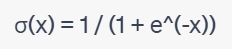
   * **Range**: 0-1
   * **Use**:Often used in the output layer for **binary classification problems** or when you need a **probability-like output**.
   * **Advantages**:It squashes the input into a small range, making it useful for models where you want to model probabilities.
   * **Disadvantages**:Sigmoid functions suffer from the vanishing gradient problem, which can slow down the learning process.

#### 1.b Tanh
  * **Range**:(-1 to 1)
  * **Use**:Similar to sigmoid, tanh is also used in the hidden layers of neural networks or as an alternative to sigmoid in the output layer for classification problems.
  * **Advantages**:It squashes the input into a small range and is zero-centered, making it useful for models that benefit from normalization.
  * **Disadvantages**:Like sigmoid, tanh also suffers from the vanishing gradient problem.

#### 1.c ReLU

  * **Range**:[0,+∞]
  * **Use**: Most commonly used activation function in deep neural networks.
  * **Advantages**: 
       * Computationally efficient.
       * Overcomes vanishing gradient problem.
       * It helps the network learn faster and can be more robust to noisy data.
  * **Disadvantages**:ReLU can cause **"dead neurons"** where the neuron becomes inactive and does not fire. This can happen if the **input is negative**, resulting in a zero gradient and no learning.

#### 1.d Leaky ReLU

  * **Range**:(-∞, +∞)
  * **Use**:Leaky ReLU is a modification of ReLU and aims to address the "dead neuron" problem.
  * **Advantages**: Leaky ReLU allows a small positive gradient for negative inputs, which helps in avoiding the "dead neuron" issue.
  * **Disadvantages**:Choosing the leakage parameter is empirical and might require tuning.

#### 1.e Parametric ReLU(PReLU):

   * **Range**:
   * **Use**:
   * **Advantages**:
   * **Disadvantages**:

### 2. MLP(Multi layer Perceptron)

### 3. Model Building using the sequential API

#### 3.a Building an Image classifier using sequential API

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


In [6]:
# Load fashion mnist dataset from keras datasets
fashion_mnsit=keras.datasets.fashion_mnist
print(type(fashion_mnsit))

<class 'module'>


In [7]:
((X_train_full,y_train_full),(X_test,y_test))=fashion_mnsit.load_data()
print(type(X_train_full),type(y_train_full),type(X_test),type(y_test))
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# creating validation set and scaling the data for faster conversion in gradient descent
X_val,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_val,y_train=y_train_full[:5000],y_train_full[5000:]
print(X_train.shape,y_train.shape)
print(y_val.shape,y_train.shape)

(55000, 28, 28) (55000,)
(5000,) (55000,)


In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
map_class={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [12]:
class_names[y_train[0]]

'Coat'

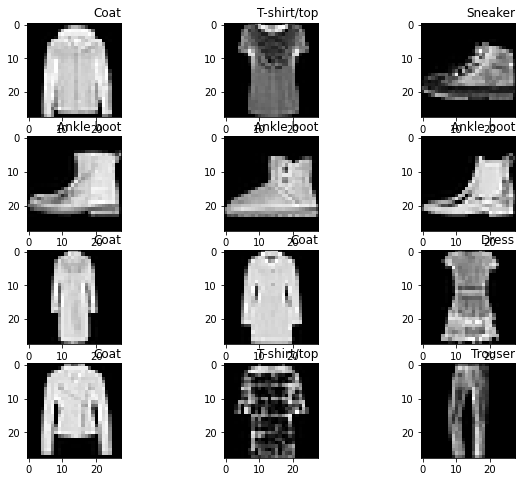

In [13]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(map_class[y_train[i]],loc='right')
plt.show()

In [24]:
# build sequential model
tf.compat.v1.reset_default_graph()
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.layers

In [27]:
model.layers[1].name

'dense'

In [28]:
model.get_layer('dense_1').name

'dense_1'

In [29]:
input_layer=model.get_layer('flatten')
hidden1=model.get_layer('dense')
hidden2=model.get_layer('dense_1')
output_layer=model.get_layer('dense_2')

In [30]:
weights,biases=hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [31]:
# compile the model
# sparse_categorical_crossentropy:sparse categorical variables,categorical_crossentropy:one hot encoded categorical variables,
# binary_crossentropy:binary categories
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [32]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)


(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)


In [41]:
# Training and evaluating the model
hostory=model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1812 - accuracy: 0.9353 - val_loss: 0.2927 - val_accuracy: 0.8972
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1783 - accuracy: 0.9365 - val_loss: 0.2998 - val_accuracy: 0.8890
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1764 - accuracy: 0.9377 - val_loss: 0.2787 - val_accuracy: 0.8982
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1729 - accuracy: 0.9377 - val_loss: 0.2901 - val_accuracy: 0.8936
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1701 - accuracy: 0.9390 - val_loss: 0.2959 - val_accuracy: 0.8960
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9407 - val_loss: 0.3017 - val_accuracy: 0.8946
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9415 - val_loss: 0.2928 - val_accuracy:

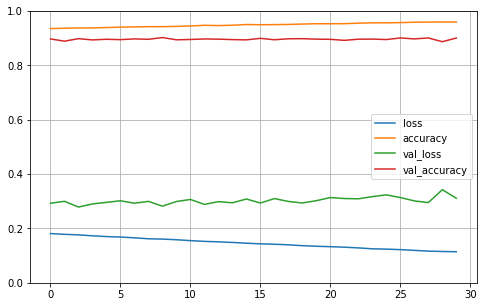

In [47]:
pd.DataFrame(hostory.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)             # set the vertical range to [0-1]
plt.show()

In [48]:
# Evaluate Model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 78.4226 - accuracy: 0.8592


[78.42263793945312, 0.8592000007629395]

In [50]:
# Use the model to make predictions
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
#Predict classes
y_classes=np.argmax(y_proba,axis=1)
y_classes

array([9, 2, 1], dtype=int64)

#### 3.b Building a Regression MLP using the sequential API